In [1]:
import cv2
import numpy as np
from sklearn.decomposition import KernelPCA, PCA
import torch

In [2]:
def get_gaussian_kernel(kernel_size:tuple, stddev:float, aniso=False, stddev2=0.2) -> np.array:
    assert kernel_size[0] == kernel_size[1]
    k1 = cv2.getGaussianKernel(kernel_size[0], stddev)
    if aniso: 
        k2 = cv2.getGaussianKernel(kernel_size[0], stddev2)
        k1 = k1 * k2.T
        return k1
    k1 = k1 * k1.T
    return k1

In [4]:
num_kernels = 10000
pca = PCA(n_components=10)

In [54]:
# aniso
aniso = False
scale = 4
np.random.seed(0)
kernels = []
stddevs = []
stddevs2 = []
for i in range(num_kernels):
    stddev = np.random.uniform(1.8, 3.2)
    stddevs.append(stddev)
    stddev2 = np.random.uniform(0.2, scale)
    stddevs2.append(stddev2)
    kernel = get_gaussian_kernel((21, 21), stddev, aniso, stddev2).reshape(-1)
    kernels.append(kernel)

In [55]:
pca.fit(kernels)
# kpca.fit(kernels)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
k_reduced = pca.transform(kernels)

In [57]:
k_reduced.shape

(10000, 10)

In [58]:
k_recon = pca.inverse_transform(k_reduced)
k_recon.shape

(10000, 441)

In [59]:
max(stddevs), min(stddevs)

(3.1999468242778275, 1.800101429493889)

In [60]:
savedict = dict(
    pca = pca,
    kernels = kernels,
    stddevs = stddevs,
    k_reduced = k_reduced,
    k_recon = k_recon,
    scale = scale,
    aniso = aniso,
)

In [61]:
torch.save(savedict, f"kernels/test/kernel_scale{int(scale)}_{'aniso' if aniso else 'iso'}_dim10.pth")

In [12]:
import matplotlib.pyplot as plt

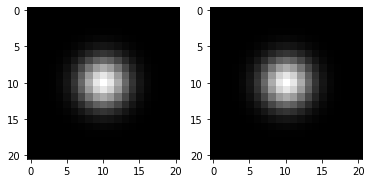

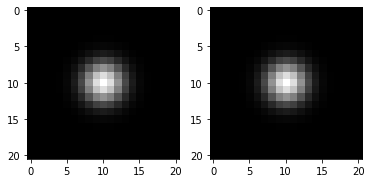

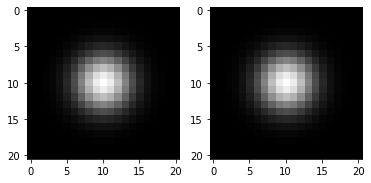

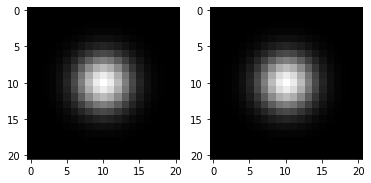

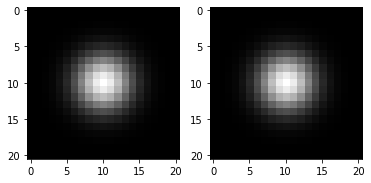

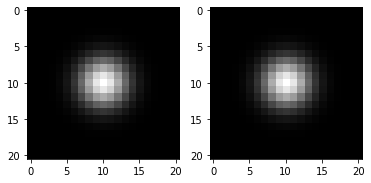

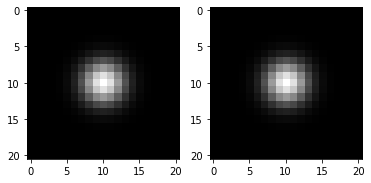

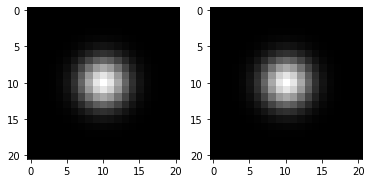

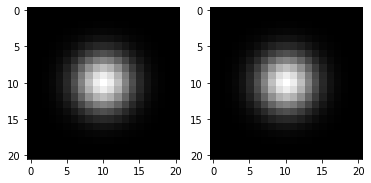

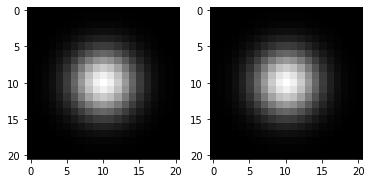

In [62]:
for i in range(40, 50):
    plt.subplot(121)
    plt.imshow(kernels[i].reshape(21, 21), cmap="gray")
    plt.subplot(122)
    plt.imshow(k_recon[i].reshape(21, 21), cmap="gray")
    plt.show()